In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import gmaps
import os
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Import API key
from api_keys import g_key
from api_keys import weather_api_key
gmaps.configure(api_key=g_key)

start_state = "01"
url = "https://api.census.gov/data/2019/pep/population?get=POP&for=state:"

map_url = "https://maps.googleapis.com/maps/api/geocode/json?"
map_query_url = f"{map_url}&key={g_key}&address="
query = f'{url}{start_state}'

# Save config information.
map_url = "https://maps.googleapis.com/maps/api/geocode/json?"

# Build partial query URL
map_query_url = f"{map_url}&key={g_key}&address="

# Input File (CSV)
input_data_file_city = "Data/annual_aqi_by_cbsa_2019.csv"
input_data_file_county = "Data/annual_aqi_by_county_2019.csv"

aqi_city = pd.read_csv(input_data_file_city)
aqi_county = pd.read_csv(input_data_file_county)
csv_df = pd.read_csv(input_data_file_city, encoding="ISO-8859-1")
from sklearn import preprocessing
from pprint import pprint
%matplotlib inline

In [32]:
########################
#CREATING DATA BY STATE
########################
aqi_county_groups = aqi_county.set_index('State').groupby(['State'])

# Get Average data by State
good_days = aqi_county_groups["Good Days"].mean()
moderate_days = aqi_county_groups["Moderate Days"].mean()
unhealthy_days = aqi_county_groups["Unhealthy Days"].mean()
very_unhealthy_days = aqi_county_groups["Very Unhealthy Days"].mean()
hazardous_days = aqi_county_groups["Hazardous Days"].mean()
days_co = aqi_county_groups["Days CO"].mean()
days_no2 = aqi_county_groups["Days NO2"].mean()
days_ozone = aqi_county_groups["Days Ozone"].mean()
days_so2 = aqi_county_groups["Days SO2"].mean()

# Create DataFrame
aqi_state_summary = pd.DataFrame({"Good Days" : good_days,
                                  "Moderate Days" : moderate_days,
                                  "Unhealthy Days" : unhealthy_days,
                                  "Very Unhealthy Days" : very_unhealthy_days,
                                  "Hazardous Days" : hazardous_days,
                                  "Days CO" : days_co,
                                  "Days NO2" : days_no2,
                                  "Days Ozone" : days_ozone,
                                  "Days SO2" : days_so2                                  
                             })
aqi_summary = pd.DataFrame({"Good Days" : good_days,
                                  "Moderate Days" : moderate_days,
                                  "Unhealthy Days" : unhealthy_days,
                                  "Very Unhealthy Days" : very_unhealthy_days,
                                  "Hazardous Days" : hazardous_days,
                                  "Days CO" : days_co,
                                  "Days NO2" : days_no2,
                                  "Days Ozone" : days_ozone,
                                  "Days SO2" : days_so2                                  
                             })
aqi_summary.drop(['Puerto Rico', 'Country Of Mexico', 'District Of Columbia','Virgin Islands'], axis=0, inplace=True)
states_updated = aqi_summary
aqi_state_summary.head()

Good Days  Moderate Days  Unhealthy Days  Very Unhealthy Days  \
State                                                                        
Alabama     142.687500      32.937500        0.062500             0.000000   
Alaska      157.500000      25.333333        1.333333             0.000000   
Arizona     183.846154      80.615385        0.538462             0.230769   
Arkansas    146.384615      32.615385        0.000000             0.000000   
California  157.075472      43.396226        0.566038             0.018868   

            Hazardous Days   Days CO  Days NO2  Days Ozone  Days SO2  
State                                                                 
Alabama           0.000000  0.062500  0.062500  105.187500  4.625000  
Alaska            0.000000  0.500000  2.666667   52.833333  0.166667  
Arizona           0.538462  0.153846  0.076923  174.769231  5.692308  
Arkansas          0.000000  0.076923  0.153846   88.538462  0.000000  
California        0.132075  0.283019  1.867925  140.264151  0.037736

In [33]:
response = requests.get(query)
response_json = response.json()
state_counts = []
state_count = len(states_updated)
for x in range(1, 57):
    str(x).zfill(2)
    state_counts.append(str(x).zfill(2))

In [34]:
pop_list = []
state_counts = state_counts
state_counts = [e for e in state_counts if e not in ('03', '07','14','43','52','11')]
for state in state_counts:
    population = requests.get(url + state).json()
    print(f'The Population of {state} is {population[1][0]}')
    pop_list.append(population[1][0])

The Population of 01 is 4903185
The Population of 02 is 731545
The Population of 04 is 7278717
The Population of 05 is 3017804
The Population of 06 is 39512223
The Population of 08 is 5758736
The Population of 09 is 3565287
The Population of 10 is 973764
The Population of 12 is 21477737
The Population of 13 is 10617423
The Population of 15 is 1415872
The Population of 16 is 1787065
The Population of 17 is 12671821
The Population of 18 is 6732219
The Population of 19 is 3155070
The Population of 20 is 2913314
The Population of 21 is 4467673
The Population of 22 is 4648794
The Population of 23 is 1344212
The Population of 24 is 6045680
The Population of 25 is 6892503
The Population of 26 is 9986857
The Population of 27 is 5639632
The Population of 28 is 2976149
The Population of 29 is 6137428
The Population of 30 is 1068778
The Population of 31 is 1934408
The Population of 32 is 3080156
The Population of 33 is 1359711
The Population of 34 is 8882190
The Population of 35 is 2096829
The Po

In [35]:
# Top 5 States with Good Days
aqi_state_summary.sort_values(by='Good Days', ascending=False).head()

Good Days  Moderate Days  Unhealthy Days  Very Unhealthy Days  \
State                                                                           
Maine          257.600000      13.300000             0.1                  0.0   
North Dakota   250.000000      22.500000             0.1                  0.0   
New York       237.000000      22.903226             0.0                  0.0   
Massachusetts  215.538462      25.153846             0.0                  0.0   
Mississippi    211.300000      42.300000             0.0                  0.0   

               Hazardous Days   Days CO  Days NO2  Days Ozone   Days SO2  
State                                                                     
Maine                     0.0  0.300000  5.000000  209.400000   0.000000  
North Dakota              0.0  0.100000  2.000000  221.000000   5.700000  
New York                  0.0  0.258065  3.709677  179.419355  27.258065  
Massachusetts             0.0  0.153846  4.923077  192.923077   0.000000  
Mississippi               0.0  0.100000  0.100000  144.300000   0.000000

In [36]:
# Top 5 States with Hazardous Days
aqi_state_summary.sort_values(by='Hazardous Days', ascending=False).head()

Good Days  Moderate Days  Unhealthy Days  Very Unhealthy Days  \
State                                                                         
Puerto Rico   89.000000      19.000000        0.200000             2.600000   
Arizona      183.846154      80.615385        0.538462             0.230769   
New Mexico   133.818182      69.909091        0.272727             0.181818   
California   157.075472      43.396226        0.566038             0.018868   
Colorado     131.440000      54.120000        0.080000             0.000000   

             Hazardous Days    Days CO   Days NO2  Days Ozone   Days SO2  
State                                                                     
Puerto Rico        2.000000  22.300000  13.300000    9.800000  10.300000  
Arizona            0.538462   0.153846   0.076923  174.769231   5.692308  
New Mexico         0.272727   0.000000   0.818182  161.727273   0.090909  
California         0.132075   0.283019   1.867925  140.264151   0.037736  
Colorado           0.040000   0.320000   3.920000  140.520000   0.120000

In [37]:
# Top 5 States with higher than normal Ozone
aqi_state_summary.sort_values(by='Days Ozone', ascending=False).head()

Good Days  Moderate Days  Unhealthy Days  Very Unhealthy Days  \
State                                                                           
Utah           192.357143      75.357143        0.571429             0.071429   
Delaware       208.333333      64.000000        0.000000             0.000000   
North Dakota   250.000000      22.500000        0.100000             0.000000   
Maine          257.600000      13.300000        0.100000             0.000000   
Massachusetts  215.538462      25.153846        0.000000             0.000000   

               Hazardous Days   Days CO  Days NO2  Days Ozone  Days SO2  
State                                                                    
Utah                      0.0  0.214286  9.928571  243.357143  0.071429  
Delaware                  0.0  0.333333  1.333333  223.333333  0.000000  
North Dakota              0.0  0.100000  2.000000  221.000000  5.700000  
Maine                     0.0  0.300000  5.000000  209.400000  0.000000  
Massachusetts             0.0  0.153846  4.923077  192.923077  0.000000

In [38]:
########################
#CREATING DATA BY CITY
########################

# Data is not collected for all 365 days by each city so an accurate picture cannot be attained with certainty. 
#This has to be taken into consideration when looking at results

#collected data percentage 
aqi_city["Year Coverage"] = aqi_city["Days with AQI"] / 365
aqi_city["Good Day Percent"] = aqi_city["Good Days"]/aqi_city["Days with AQI"]

# Cities with best data coverage for evaluation (atleast 70% or higher data collected in 365 days)  
coverage = aqi_city.loc[aqi_city["Year Coverage"] >= .70]
coverage_df = pd.DataFrame(coverage)

df = pd.DataFrame(aqi_city)
# Top 5 cities with best air quality
coverage_df.sort_values(['Good Day Percent'], ascending=[False]).head()

CBSA  CBSA Code  Year  Days with AQI  Good Days  \
282                    Malone, NY      31660  2019            272        272   
27         Augusta-Waterville, ME      12300  2019            270        266   
254  Lake Havasu City-Kingman, AZ      29420  2019            273        268   
477                Utica-Rome, NY      46540  2019            267        260   
31                     Bangor, ME      12620  2019            304        294   

     Moderate Days  Unhealthy for Sensitive Groups Days  Unhealthy Days  \
282              0                                    0               0   
27               4                                    0               0   
254              5                                    0               0   
477              7                                    0               0   
31              10                                    0               0   

     Very Unhealthy Days  Hazardous Days  ...  90th Percentile AQI  \
282                    0               0  ...                    0   
27                     0               0  ...                   45   
254                    0               0  ...                   29   
477                    0               0  ...                   40   
31                     0               0  ...                   45   

     Median AQI  Days CO  Days NO2  Days Ozone  Days SO2  Days PM2.5  \
282           0        0         0           0       272           0   
27           33        0        50         210         0          10   
254          15        0         0           0         0           0   
477          27        0         0         115         0         152   
31           33        0         0         208         0          92   

     Days PM10  Year Coverage  Good Day Percent  
282          0       0.745205          1.000000  
27           0       0.739726          0.985185  
254        273       0.747945          0.981685  
477          0       0.731507          0.973783  
31           4       0.832877          0.967105  

[5 rows x 21 columns]

In [39]:
df[["city","state"]] = df["CBSA"].str.split(", ",expand=True)
state_df = aqi_county.groupby("State").mean()["90th Percentile AQI"]
state_df_ = pd.DataFrame(state_df)

y = 258122.01x + -7181262.44


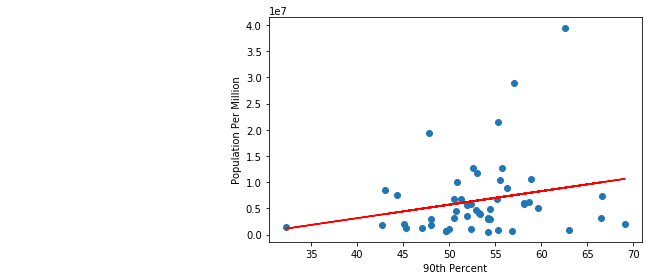

In [40]:
# Create a Scatter Plot for poulation vs aqi
new_df = pd.DataFrame(pop_list)
new_df = new_df.set_index(states_updated.index)
states_updated["Population"] = new_df
states_updated['Population'] = states_updated['Population'].astype(int)
newest_df = pd.merge(state_df, states_updated, on="State")
x_values = newest_df["90th Percentile AQI"]
y_values = newest_df['Population']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel('90th Percent')
plt.ylabel('Population Per Million')
plt.plot(x_values,regress_values,"r-")
plt.tight_layout()
plt.annotate(line_eq, (2,5), fontsize=15,color="red")
print(line_eq);

plt.show()

In [41]:
# The original imported dataset for AQI does not have Latitude and Longitude for each city.  In order to map it, lat & Lng
# is pulled from google
available_cities = []
state = []
lats = []
lngs = []
medianAQI = []
good_days = []
hazardous_days = []
percentile = []

print("----------Pulling City Lat and Lng data------------")

#loop through all the cities from the imported dataset
for i in range (len(aqi_city['CBSA'])):
    try:
        #handle spaces in city names
        response = requests.get(map_query_url + aqi_city['CBSA'][i].replace(" ","+")).json()

        #gather city data
        available_cities.append(aqi_city['CBSA'][i])
        
        #get state from city name
        state.append(aqi_city['CBSA'][i].rsplit(", ")[1])
        
        #get lat & Lng from json response
        lat1 = round(response['results'][0]['geometry']['location']['lat'], 2)
        lng1 = round(response['results'][0]['geometry']['location']['lng'], 2)
        lats.append(lat1)
        lngs.append(lng1)
        
        #collect medianAQI for found cities
        medianAQI.append(aqi_city['Median AQI'][i])
        
        #collect good days for found cities
        good_days.append(aqi_city['Good Days'][i])
        
        #collect hazardous days for found cities
        hazardous_days.append(aqi_city['Hazardous Days'][i])
        
        #collect percentile AQI 
        percentile.append(aqi_city['90th Percentile AQI'][i])

        #print city data as its aquired
        print(aqi_city['CBSA'][i] + ", Lat:" + str(lat) + ", Lng:" + str(lng))
              
    except Exception:
        #print city name that was not found
        print(aqi_city['CBSA'][i] + " not found!")

print("-------------Data Read Completed-------------")

available_city_data = {
    "City":available_cities,
    "State": state,
    "Lat":lats,
    "Lng":lngs,
    "AQI": medianAQI,
    "Good Days": good_days,
    "Hazardous Days": hazardous_days,
    "90th Percentile AQI": percentile
}


----------Pulling City Lat and Lng data------------
Aberdeen, SD, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35

Adrian, MI, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 3

Albany, GA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 3

Albany-Schenectady-Troy, NY, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12

Alexandria, LA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.2

Altoona, PA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 

Anchorage, AK, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21

Ardmore, OK, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 

Asheville, NC, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21

Athens, OH, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 3

Athens-Clarke County, GA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 3

Atlantic City-Hammonton, NJ, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12

Augusta-Waterville, ME, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.

Bakersfield, CA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.

Bangor, ME, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 3

Baton Rouge, LA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.

Beaumont-Port Arthur, TX, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 3

Bellingham, WA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.2

Bend-Redmond, OR, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33

Berlin, NH-VT, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21

Billings, MT, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21,

Bishop, CA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 3

Blacksburg-Christiansburg-Radford, VA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44

Bloomington, IN, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.

Borger, TX, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 3

Boulder, CO, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 

Bozeman, MT, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 

Bremerton-Silverdale, WA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 3

Brookings, SD, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21

Brunswick, GA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21

Burlington-South Burlington, VT, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 3

Cadillac, MI, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21,

Canton-Massillon, OH, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79

Carlsbad-Artesia, NM, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79

Casper, WY, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 3

Cedar City, UT, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.2

Centralia, WA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21

Champaign-Urbana, IL, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79

Charleston-North Charleston, SC, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 3

Charlottesville, VA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79,

Cheyenne, WY, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21,

Chico, CA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 31

Claremont-Lebanon, NH-VT, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 3

Clarksville, TN-KY, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 

Cleveland, MS, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21

Clinton, IA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 

Colorado Springs, CO, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79

Columbia, SC, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21,

Columbus, IN, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21,

Concord, NH, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 

Coos Bay, OR, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21,

Corpus Christi, TX, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 

Corvallis, OR, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21

Cullowhee, NC, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21

Dallas-Fort Worth-Arlington, TX, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 3

Daphne-Fairhope-Foley, AL, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 

Dayton, OH, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 3

Decatur, IL, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 

Deming, NM, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 3

Des Moines-West Des Moines, IA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39

Dickinson, ND, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21

Dothan, AL, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 3

DuBois, PA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 3

Durango, CO, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 

Dyersburg, TN, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21

East Stroudsburg, PA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79

Effingham, IL, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21

El Paso, TX, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 

Elkhart-Goshen, IN, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 

Ellensburg, WA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.2

Espa¤ola, NM, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21,

Eureka-Arcata-Fortuna, CA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 

Evansville, IN-KY, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 3

Fairmont, WV, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21,

Fargo, ND-MN, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21,

Fayetteville, NC, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33

Fernley, NV, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 

Flint, MI, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 31

Florence-Muscle Shoals, AL, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12,

Fort Collins, CO, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33

Fort Payne, AL, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.2

Fort Wayne, IN, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.2

Gadsden, AL, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 

Gainesville, GA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.

Georgetown, SC, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.2

Gillette, WY, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21,

Grand Island, NE, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33

Grand Rapids-Wyoming, MI, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 3

Great Falls, MT, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.

Green Bay, WI, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21

Greensboro-High Point, NC, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 

Greenville-Anderson-Mauldin, SC, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 3

Gulfport-Biloxi-Pascagoula, MS, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39

Hailey, ID, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 3

Hanford-Corcoran, CA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79

Harrisonburg, VA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33

Hattiesburg, MS, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.

Hermiston-Pendleton, OR, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32

Hilo, HI, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 31.

Holland, MI, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 

Hot Springs, AR, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.

Houston-The Woodlands-Sugar Land, TX, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.

Huntington-Ashland, WV-KY-OH, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.1

Idaho Falls, ID, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.

Indianapolis-Carmel-Anderson, IN, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 

Ithaca, NY, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 3

Jackson, TN, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 

Jacksonville, FL, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33

Janesville-Beloit, WI, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.7

Jefferson City, MO, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 

Jonesboro, AR, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21

Juneau, AK, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 3

Kalamazoo-Portage, MI, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.7

Kapaa, HI, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 31

Kennewick-Richland, WA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.

Kingsport-Bristol-Bristol, TN-VA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 

Kinston, NC, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 

Kokomo, IN, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 3

La Grande, OR, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21

Lafayette, LA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21

Lake Charles, LA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33

Lake Havasu City-Kingman, AZ, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.1

Lancaster, PA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21

Laramie, WY, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 

Las Cruces, NM, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.2

Lawrenceburg, TN, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33

Lebanon, PA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 

Lewiston-Auburn, ME, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79,

Lima, OH, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 31.

Little Rock-North Little Rock-Conway, AR, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0,

Longview, TX, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21,

Louisville/Jefferson County, KY-IN, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81

Ludington, MI, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21

Macon, GA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 31

Madison, WI, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 

Manchester-Nashua, NH, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.7

Marietta, OH, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21,

Marshall, TX, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21,

Mayaguez, PR, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21,

McAllen-Edinburg-Mission, TX, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.1

Memphis, TN-MS-AR, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 3

Meridian, MS, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21,

Miami-Fort Lauderdale-West Palm Beach, FL, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0

Middlesborough, KY, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 

Minneapolis-St. Paul-Bloomington, MN-WI, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 

Missoula, MT, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21,

Modesto, CA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 

Monroe, MI, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 3

Morehead City, NC, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 3

Morristown, TN, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.2

Moses Lake, WA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.2

Mount Vernon, IL, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33

Mount Vernon-Anacortes, WA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12,

Muscatine, IA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21

Muskogee, OK, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21,

Napa, CA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 31.

Nashville-Davidson--Murfreesboro--Franklin, TN, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71,

New Castle, PA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.2

New Orleans-Metairie, LA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 3

Niles-Benton Harbor, MI, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32

North Port-Sarasota-Bradenton, FL, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81,

Ocala, FL, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 31

Ogden-Clearfield, UT, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79

Oklahoma City, OK, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 3

Omaha-Council Bluffs, NE-IA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12

Othello, WA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 

Owensboro, KY, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21

Oxnard-Thousand Oaks-Ventura, CA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 

Pahrump, NV, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 

Palm Bay-Melbourne-Titusville, FL, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81,

Parkersburg-Vienna, WV, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.

Pensacola-Ferry Pass-Brent, FL, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39

Philadelphia-Camden-Wilmington, PA-NJ-DE-MD, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41

Pierre, SD, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 3

Pittsfield, MA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.2

Pocatello, ID, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21

Ponca City, OK, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.2

Port Angeles, WA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33

Portland-South Portland, ME, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12

Portsmouth, OH, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.2

Price, UT, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 31

Provo-Orem, UT, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.2

Pullman, WA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 

Racine, WI, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 3

Rapid City, SD, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.2

Red Wing, MN, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21,

Reno, NV, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 31.

Riverside-San Bernardino-Ontario, CA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.

Roanoke Rapids, NC, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 

Rochester, MN, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21

Rock Springs, WY, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33

Rockland, ME, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21,

Rome, GA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 31.

Sacramento--Roseville--Arden-Arcade, CA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 

Salem, OR, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 31

Salisbury, MD-DE, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33

San Antonio-New Braunfels, TX, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.

San Francisco-Oakland-Hayward, CA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81,

San Juan-Carolina-Caguas, PR, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.1

Sandpoint, ID, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21

Santa Fe, NM, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21,

Santa Rosa, CA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.2

Savannah, GA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21,

Scottsbluff, NE, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.

Seattle-Tacoma-Bellevue, WA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12

Sebring, FL, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 

Sevierville, TN, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.

Sheboygan, WI, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21

Sheridan, WY, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21,

Shreveport-Bossier City, LA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12

Sioux City, IA-NE-SD, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79

Somerset, KY, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21,

Sonora, CA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 3

Spartanburg, SC, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.

Springfield, IL, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.

Springfield, MO, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.

St. Cloud, MN, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21

St. Joseph, MO-KS, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 3

St. Marys, PA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21

Steamboat Springs, CO, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.7

Summerville, GA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.

Tallahassee, FL, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.

Taos, NM, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 31.

Texarkana, TX-AR, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33

Topeka, KS, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 3

Traverse City, MI, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 3

Truckee-Grass Valley, CA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 3

Tulsa, OK, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 31

Tuscaloosa, AL, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.2

Tyler, TX, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 31

Urban Honolulu, HI, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 

Vallejo-Fairfield, CA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.7

Victoria, TX, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21,

Vineland-Bridgeton, NJ, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.

Virginia Beach-Norfolk-Newport News, VA-NC, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.

Wabash, IN, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 3

Walla Walla, WA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.

Warner Robins, GA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 3

Washington Court House, OH, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12,

Washington, NC, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.2

Waterloo-Cedar Falls, IA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 3

Watertown-Fort Atkinson, WI, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12

Wausau, WI, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 3

Weirton-Steubenville, WV-OH, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12

Wheeling, WV-OH, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.

Wichita, KS, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21, 

Williston, ND, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21

Wilmington, OH, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.2

Winston-Salem, NC, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 3

York-Hanover, PA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33

Yuba City, CA, Lat:[45.46, 46.98, 18.16, 41.9, 41.08, 31.58, 44.64, 42.76, 35.08, 31.31, 40.58, 40.52, 35.22, 32.07, 61.22, 42.28, 44.26, 34.17, 34.12, 35.6, 41.87, 39.33, 35.44, 33.95, 33.85, 39.64, 33.47, 44.45, 30.12, 35.37, 39.37, 44.8, 43.47, 41.7, 30.45, 43.59, 30.08, 43.46, 48.75, 47.47, 44.25, 42.88, 44.47, 32.25, 45.78, 33.41, 37.36, 46.81, 37.13, 40.48, 39.17, 43.62, 35.67, 42.36, 40.01, 36.97, 45.68, 46.35, 47.64, 41.26, 44.31, 26.19, 31.15, 42.85, 44.48, 46.0, 44.25, 38.56, 40.8, 26.64, 32.44, 39.16, 42.85, 38.45, 37.68, 41.98, 46.72, 39.94, 40.12, 38.35, 32.88, 35.12, 38.03, 35.05, 41.14, 42.22, 39.73, 39.11, 43.65, 39.28, 36.53, 38.96, 33.74, 41.39, 41.84, 47.67, 30.83, 38.83, 38.95, 34.0, 32.46, 39.2, 39.96, 43.21, 36.16, 43.37, 42.14, 27.8, 32.1, 44.56, 41.76, 30.44, 35.31, 39.65, 32.71, 34.77, 30.6, 41.51, 39.76, 34.61, 39.84, 29.04, 32.27, 39.51, 41.56, 42.32, 46.88, 37.75, 31.22, 31.51, 39.16, 41.12, 46.79, 37.28, 35.91, 36.03, 28.71, 41.0, 44.81, 39.12, 32.79, 33.21

In [42]:
map_ready_data = pd.DataFrame(available_city_data)
map_ready_data.head()
#KENG85 | Rename Column to merge on CBSA
map_ready_data.rename(columns = {"City":"CBSA"}, inplace = True)
merged_aqi_data = pd.merge(map_ready_data, aqi_city, how="outer", on='CBSA')

y = 0.0x + 38.41


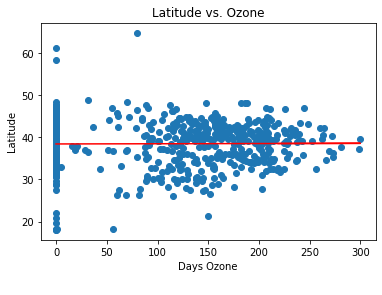

In [43]:
#KENG85 | To determine whether latitude (as an indicator of relative temperature) has an affect on air quality
#KENG85 | as indicated by Ozone
y_values = merged_aqi_data["Lat"]
x_values = merged_aqi_data["Days Ozone"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.ylabel('Latitude')
plt.xlabel('Days Ozone')
plt.title("Latitude vs. Ozone")
plt.plot(x_values,regress_values,"r-")
plt.savefig('scatter_ozone_v_lat.png')
plt.annotate(line_eq, (2,5), fontsize=15,color="red")
print(line_eq);

y = 0.0x + 38.27


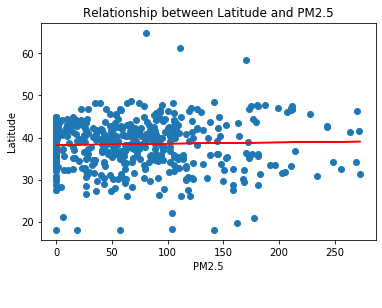

In [44]:
#KENG85 | To determine whether latitude (as an indicator of relative temperature) has an affect on air quality
#KENG85 | as indicated by PM2.5

y_values = merged_aqi_data["Lat"]
x_values = merged_aqi_data["Days PM2.5"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.ylabel('Latitude')
plt.xlabel('PM2.5')
plt.title("Relationship between Latitude and PM2.5")
plt.plot(x_values,regress_values,"r-")
plt.savefig('scatter_PM25_v_lat.png')
plt.annotate(line_eq, (2,2), fontsize=15,color="red")
print(line_eq);

In [45]:
#KENG85 | Calculate the correlation coefficient of Particulates to see whether there is any correlation with latitude;  
#KENG85 | Based on a correlation coefficients, we determined that Air Quality is not correlated with latitude
k_good = merged_aqi_data["Good Day Percent"]
k_bad = merged_aqi_data["Hazardous Days_x"]
k_lat = merged_aqi_data["Lat"]
k_ozone = merged_aqi_data["Days Ozone"]
k_PM2 = merged_aqi_data["Days PM2.5"]
k_CO = merged_aqi_data["Days CO"]
k_NO2 = merged_aqi_data["Days NO2"]
k_SO2 = merged_aqi_data["Days SO2"]

pm_df = pd.DataFrame({"Good Day" : k_good,
                      "Hazardous": k_bad,
                      "Lat": k_lat,
                     "Ozone" : k_ozone,
                     "PM2.5" : k_PM2,
                     "CO" : k_CO,
                     "NO2": k_NO2,
                     "SO2": k_SO2,})
pm_df.corr(method ='pearson')

Good Day  Hazardous       Lat     Ozone     PM2.5        CO  \
Good Day   1.000000  -0.223781  0.223847 -0.221102 -0.163890 -0.207602   
Hazardous -0.223781   1.000000 -0.160776 -0.026212  0.009578  0.139799   
Lat        0.223847  -0.160776  1.000000  0.006725  0.030702 -0.020338   
Ozone     -0.221102  -0.026212  0.006725  1.000000 -0.492758  0.021170   
PM2.5     -0.163890   0.009578  0.030702 -0.492758  1.000000  0.062112   
CO        -0.207602   0.139799 -0.020338  0.021170  0.062112  1.000000   
NO2       -0.116676   0.051579 -0.000378  0.046008 -0.012547  0.180226   
SO2        0.122849  -0.015090  0.001272 -0.274575 -0.201061 -0.029304   

                NO2       SO2  
Good Day  -0.116676  0.122849  
Hazardous  0.051579 -0.015090  
Lat       -0.000378  0.001272  
Ozone      0.046008 -0.274575  
PM2.5     -0.012547 -0.201061  
CO         0.180226 -0.029304  
NO2        1.000000 -0.058743  
SO2       -0.058743  1.000000

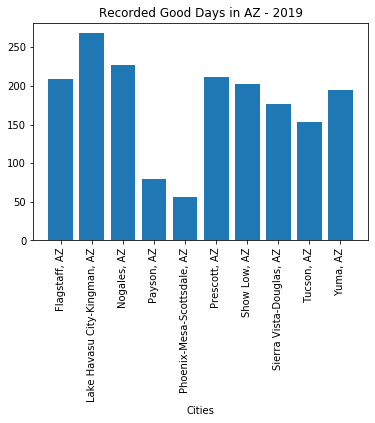

CBSA State    Lat     Lng  AQI  Good Days  \
162                 Flagstaff, AZ    AZ  35.20 -111.65   46        209   
254  Lake Havasu City-Kingman, AZ    AZ  34.48 -114.32   15        268   
332                   Nogales, AZ    AZ  31.34 -110.93   29        227   
354                    Payson, AZ    AZ  34.23 -111.33   67         79   
358   Phoenix-Mesa-Scottsdale, AZ    AZ  33.42 -111.83   67         56   
372                  Prescott, AZ    AZ  34.54 -112.47   44        211   
433                  Show Low, AZ    AZ  34.25 -110.03   45        203   
435      Sierra Vista-Douglas, AZ    AZ  31.83 -109.95   47        176   
469                    Tucson, AZ    AZ  32.22 -110.97   49        153   
519                      Yuma, AZ    AZ  32.69 -114.63   46        195   

     Hazardous Days  90th Percentile AQI  
162               0                   61  
254               0                   29  
332               0                   56  
354               0                  112  
358               7                  104  
372               0                   58  
433               0                   61  
435               0                   71  
469               0                   74  
519               0                   71

In [46]:
# Hypothesis: An assumption can be made that region with higher concentration of population & industry can reduce air quality
# Congested metropolitan city like Phoenix with high traffic volume and more industries would show lower number of Good Days 
# (AQI between 0-50) than cities that have lower population, low traffic and no pollution creating industry

AZ_data = map_ready_data.loc[map_ready_data["State"] == 'AZ']

#create bar chart
x_axis = np.arange(len(AZ_data))
plt.bar(x_axis, AZ_data["Good Days"], align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, AZ_data["CBSA"], rotation="vertical")
plt.title('Recorded Good Days in AZ - 2019')
plt.xlabel('Cities')
plt.show()
AZ_data

# Conclusion: Phoenix metropolitan area does experiences lower number of Good Days.  Lake Havasu City-Kingman reported 
# higher number of Good Days with low median AQI

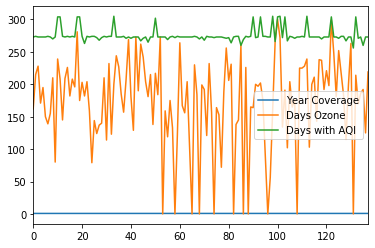

In [47]:
line_plot_df = coverage_df.reset_index()
line_plot_df
line_plot_final = line_plot_df[["Year Coverage", "Days Ozone", "Days with AQI"]]
line_plot_final
lines = line_plot_final.plot.line()

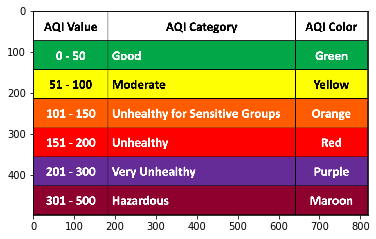

Figure(layout=FigureLayout(border='1px solid black', height='400px', margin='0 auto 0 auto', padding='1px', wi…

In [48]:
# Heatmap of Arizona based on AQI data
location_data = AZ_data[["Lat","Lng"]]
data = AZ_data["AQI"].astype(float)

#Figure Layout
figure_layout = {
    'width': '800px',
    'height': '400px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)
heatmap = gmaps.heatmap_layer(location_data, weights=data,dissipating=False, max_intensity=100,point_radius=1)
fig.add_layer(heatmap)
image = mpimg.imread("picture.png")
plt.imshow(image)
plt.show()
fig

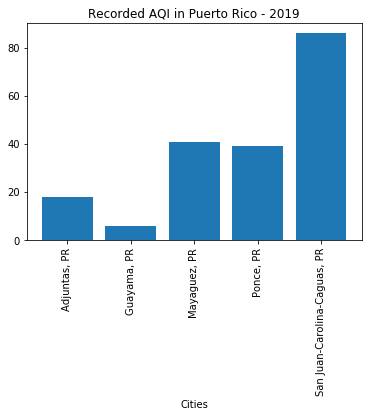

In [49]:
# Top 5 States with Hazardous Days resulted in Puerto Rico as a territory with most number of Hazardous Days.
# below graphs shows which city had the most Hazardous days in Puerto Rico 
by_state_data = map_ready_data.loc[map_ready_data["State"] == 'PR']

#create bar chart
x_axis = np.arange(len(by_state_data))
plt.bar(x_axis, by_state_data["AQI"], align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, by_state_data["CBSA"], rotation="vertical")
plt.title('Recorded AQI in Puerto Rico - 2019')
plt.xlabel('Cities')
plt.show()


#Conclusion: San Juan-Carolina-Caguas had the most occurance with Hazardous Days

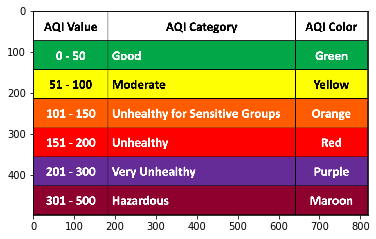

Figure(layout=FigureLayout(border='1px solid black', height='400px', margin='0 auto 0 auto', padding='1px', wi…

In [50]:
# Heatmap of Puerto Rico based on AQI data
location_data = by_state_data[["Lat","Lng"]]
data = by_state_data["AQI"].astype(float)

#Figure Layout
figure_layout = {
    'width': '800px',
    'height': '400px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)
heatmap = gmaps.heatmap_layer(location_data, weights=data,
                              dissipating=False, max_intensity=100,
                              point_radius=1)
fig.add_layer(heatmap)
image = mpimg.imread("picture.png")
plt.imshow(image)
plt.show()
fig

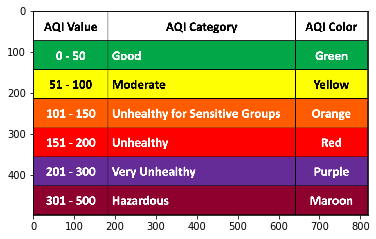

Figure(layout=FigureLayout(border='1px solid black', height='400px', margin='0 auto 0 auto', padding='1px', wi…

In [51]:
# Hypothesis: CNN Article on Tue 4/7/2020 showed a heatmap of US with cities that have PM 2.5 higher than 13 micrograms.
# The data was averaged from 2000-2016. Using the data from Annual AQI by CBSA 2019, we want to see if 2019 data shows
# same heatmap as CNN source.  
# Source article URL: https://www.cnn.com/2020/04/07/health/covid-19-air-pollution-risks-wellness/index.html



AQI_data = map_ready_data.loc[map_ready_data["90th Percentile AQI"].astype(float) >= 51]
data_df = pd.DataFrame(AQI_data)

location_data = data_df[["Lat","Lng"]]
data = data_df["90th Percentile AQI"].astype(float)

#Figure Layout
figure_layout = {
    'width': '800px',
    'height': '400px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)
heatmap = gmaps.heatmap_layer(location_data, weights=data,
                              dissipating=False, max_intensity=120,
                              point_radius=1)
fig.add_layer(heatmap)
image = mpimg.imread("picture.png")
plt.imshow(image)
plt.show()
fig

# Conclusion: 2019 Data below looks similar to the average data from 2000-2016 as shown in the article.  Visually, a case
# can be made that there are more cities with bad air quality in 2019 than average from 2000-2016.
# Souce: https://cdn.cnn.com/cnnnext/dam/assets/200407173521-20200407-covid-19-air-pollution-top-map-exlarge-169.jpg)




In [52]:
# Check for Duplicate data, seems there is none
duplicate_data = csv_df.loc[csv_df.duplicated(subset = ['CBSA','CBSA']),'CBSA Code'].unique()
duplicate_data


array([], dtype=int64)

In [53]:
clean_data = csv_df.drop(['Year'],axis =1)
clean_data.head(2)

CBSA  CBSA Code  Days with AQI  Good Days  Moderate Days  \
0  Aberdeen, SD      10100             60         52              8   
1  Aberdeen, WA      10140            199        199              0   

   Unhealthy for Sensitive Groups Days  Unhealthy Days  Very Unhealthy Days  \
0                                    0               0                    0   
1                                    0               0                    0   

   Hazardous Days  Max AQI  90th Percentile AQI  Median AQI  Days CO  \
0               0       77                   56          24        0   
1               0       40                   30          18        0   

   Days NO2  Days Ozone  Days SO2  Days PM2.5  Days PM10  
0         0           0         0          54          6  
1         0           0         0         199          0

In [54]:
# lists to hold responses
lat = []
lng = []
CBSA = []
max_AQI = []
PM2_5 = []

# Build the Query URL 
base_url =  "https://maps.googleapis.com/maps/api/geocode/json?"
query_url = f"{base_url}&key={g_key}&address="

# start iteration for API calls
for i in range (len(clean_data['CBSA'])):
    try:
        
        # call API and store a reponse
        response = requests.get(query_url + clean_data['CBSA'][i].replace(" ","+")).json()

        # append reponse data to respective lists
        latitude = round(response['results'][0]['geometry']['location']['lat'], 2)

        longitude = round(response['results'][0]['geometry']['location']['lng'], 2)
        
        CBSA.append(clean_data['CBSA'][i])
        lat.append(latitude)
        lng.append(longitude)
        max_AQI.append(clean_data['Max AQI'][i])
        PM2_5.append(clean_data['Days PM2.5'][i])
        
        
    except KeyError:
        print(clean_data['CBSA'][i] + " not found!")

print("Processing Complete")

Processing Complete


In [55]:
zipped_latlng = list(zip(CBSA,lat,lng,max_AQI,PM2_5))

In [56]:
dataMap_df = pd.DataFrame(zipped_latlng, columns = ['CBSA' ,'Latitude','Longitude','Max AQI','PM2_5'])
dataMap_df.head()

CBSA  Latitude  Longitude  Max AQI  PM2_5
0  Aberdeen, SD     45.46     -98.49       77     54
1  Aberdeen, WA     46.98    -123.82       40    199
2  Adjuntas, PR     18.16     -66.72       58     57
3    Adrian, MI     41.90     -84.04       90     87
4     Akron, OH     41.08     -81.52      115    110

In [57]:
# Configure gmaps
gmaps.configure(api_key = g_key)

# Locations
locations = dataMap_df[["Latitude", "Longitude"]]
# weight variables 
max_aqi = dataMap_df["Max AQI"]
pm2_5 = dataMap_df["PM2_5"]



#create a gmaps obejct
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights = pm2_5, dissipating=False, max_intensity= 300 ,point_radius = 2)

# add layer to the figure
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [58]:

# Using the template add PM2.5 ,MAX AQI and CBSA name to the heatmap
info_box_template = """
<dl>
<dt>CBSA</dt><dd>{CBSA}</dd>
<dt>MAX AQI</dt><dd>{Max AQI}</dd>
<dt>PM2.5</dt><dd>{PM2_5}</dd>
</dl>
"""

# Store the DataFrame Row

info = [info_box_template.format(**row) for index, row in dataMap_df.iterrows()]

locations = dataMap_df[["Latitude", "Longitude"]]

In [59]:
# Add marker layer ontop of heat map
markers = gmaps.marker_layer(locations, info_box_content= info)
fig.add_layer(markers)

# Display Map
fig

Figure(layout=FigureLayout(height='420px'))